# **Import Some Libraries  :**

In [1]:
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, regularizers
import numpy as np
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')


# **Prepare Some Functions To Be Used :**

## Data Visualization :

In [2]:
def PlotImages(Diseases):
    plt.figure(figsize = (19,19))

    for i, Disease in enumerate(Diseases):
        ImagePath = TrainPath + '/' + Disease
        ImagesInFolder = os.listdir(ImagePath)

        STImage = ImagesInFolder[0]
        STImagePath = ImagePath + '/' + STImage

        Image = image.load_img(STImagePath)
        ImagesArray = image.img_to_array(Image) / 255

        plt.subplot(1,7, i+1)
        plt.imshow(ImagesArray)
        plt.title(Disease)
        plt.axis('off')
    plt.show()

## Make a Prediction :

In [3]:
# Define ImageDataGenerator with preprocessing
ImageGen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
)

def prediction(testing_image, actual_label):
    # Load and preprocess the image
    test_img = image.load_img(testing_image, target_size=(224, 224))
    test_img_array = image.img_to_array(test_img)
    
    # Apply ImageDataGenerator transformations
    test_img_array = ImageGen.random_transform(test_img_array)  # Apply zoom augmentation
    test_img_array /= 255.0  # Ensure rescaling

    test_img_input = np.expand_dims(test_img_array, axis=0)  # Reshape for model input

    # Make prediction
    predicted_class = np.argmax(model2.predict(test_img_input))
    class_img = class_map[predicted_class]

    # Display the image with prediction
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_array)
    plt.title("Actual Label: {} , Predicted Label: {}".format(actual_label, class_img))
    plt.grid(False)
    plt.axis('off')
    plt.show()


# **Reading The Dataset :**

In [4]:
TrainPath = '/kaggle/input/oral-diseases-dataset-7-different-diseases/Oral Diseases Dataset/Training'
TestPath = '/kaggle/input/oral-diseases-dataset-7-different-diseases/Oral Diseases Dataset/Testing'
ValidationPath='/kaggle/input/oral-diseases-dataset-7-different-diseases/Oral Diseases Dataset/Validation'


# **Exploring All Diseases With Example for Each One :**

In [5]:
Diseases = os.listdir('/kaggle/input/oral-diseases-dataset-7-different-diseases/Oral Diseases Dataset/Training')
Diseases

['OC', 'CaS', 'OT', 'CoS', 'Gum', 'MC', 'OLP']

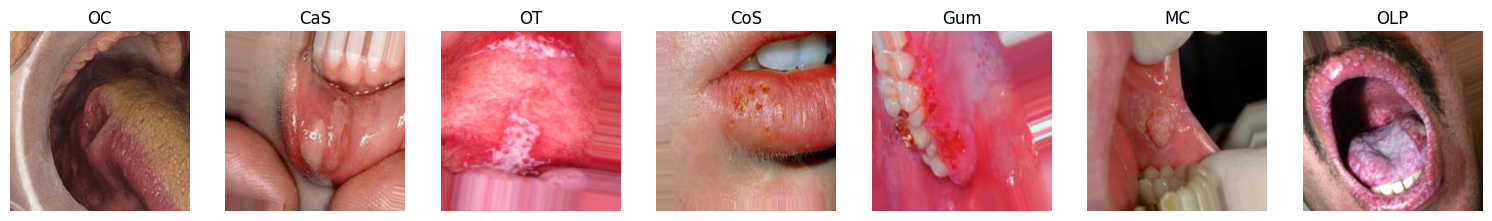

In [6]:
PlotImages(Diseases)

# **Image Preprocessing :**

In [7]:
ImageGen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
)


In [8]:
TrainSet = ImageGen.flow_from_directory(TrainPath,target_size = (224,224),class_mode='categorical')

Found 3087 images belonging to 7 classes.


In [9]:
TestSet = ImageGen.flow_from_directory(TestPath, target_size=(224,224), class_mode='categorical', batch_size=32)


Found 1028 images belonging to 7 classes.


In [10]:
ValidationSet = ImageGen.flow_from_directory(ValidationPath,target_size = (224,224),class_mode='categorical')

Found 1028 images belonging to 7 classes.


# **Model Building :**

**There were many trials before this many but this was the best one by the highest validation score and least overfitting percentage**

In [11]:
model2 = keras.Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
  

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),



    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 classes
])

# **Compile & Fit Model :**

In [12]:
model2.compile(optimizer = 'adamax',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=13, restore_best_weights=True)

In [14]:
model_history = model2.fit(TrainSet,epochs = 75,validation_data = ValidationSet,callbacks=[early_stop])

Epoch 1/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.1791 - loss: 2.1273 - val_accuracy: 0.1479 - val_loss: 1.9524
Epoch 2/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 60s 583ms/step - accuracy: 0.2595 - loss: 1.8261 - val_accuracy: 0.1449 - val_loss: 2.1680
Epoch 3/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 63s 615ms/step - accuracy: 0.3287 - loss: 1.7338 - val_accuracy: 0.2286 - val_loss: 1.9412
Epoch 4/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 75s 731ms/step - accuracy: 0.3713 - loss: 1.6359 - val_accuracy: 0.1556 - val_loss: 2.5254
Epoch 5/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 68s 663ms/step - accuracy: 0.4065 - loss: 1.5850 - val_accuracy: 0.2626 - val_loss: 1.8848
Epoch 6/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 56s 553ms/step - accuracy: 0.4152 - loss: 1.5328 - val_accuracy: 0.3998 - val_loss: 1.5902
Epoch 7/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 55s 541ms/step - accuracy: 0.4536 - loss: 1.4504 - val_accuracy: 0.2889 - val_loss: 1.8541
Epoch 8/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 56s 550ms/step - accuracy: 0.4643 - loss: 1.4286 - val_accura

# **Model Performance Visualization :**

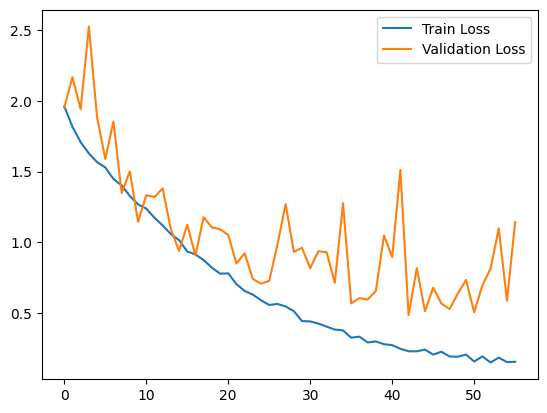

In [15]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

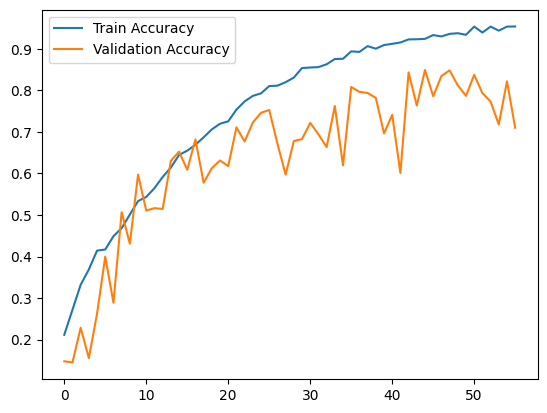

In [16]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

# **Prininting The Final Weights :**

In [17]:
for layer in model2.layers:
    print(f"Layer: {layer.name}")
    print(layer.get_weights())  # Prints weights for each layer
    print("\n")


Layer: conv2d
[array([[[[ 3.19251902e-02,  2.51005609e-02, -4.91209812e-02, ...,
          -1.37217166e-02,  3.01444996e-02,  4.27292706e-03],
         [-7.19128363e-03,  6.11958653e-02, -3.62896696e-02, ...,
           3.71590741e-02, -5.36012501e-02, -3.64322141e-02],
         [ 2.25277524e-02, -3.73224262e-03, -2.12063603e-02, ...,
           2.63445862e-02,  3.02529559e-02, -1.26208682e-02]],

        [[-1.29840728e-02,  4.95989323e-02,  6.19614590e-03, ...,
          -9.65053029e-03, -6.26885332e-03,  4.22371402e-02],
         [ 2.23812298e-03,  5.80440201e-02,  3.26015241e-02, ...,
          -1.36965029e-02, -3.24332789e-02, -5.01947813e-02],
         [-1.38445590e-02,  5.47557734e-02, -5.33249713e-02, ...,
          -3.53077352e-02, -4.35422398e-02, -1.68367177e-02]],

        [[-3.03670880e-03,  4.46627773e-02, -5.00590578e-02, ...,
          -1.46701420e-02,  2.10422538e-02,  3.86977270e-02],
         [-1.77370552e-02,  1.90866105e-02,  2.68207248e-02, ...,
           3.314120

# **Printing The Expected Shapes for Inputs & Outputs :**

In [18]:
print(model2.input_shape)


(None, 224, 224, 3)


In [19]:
print(model2.output_shape)


(None, 7)


In [20]:
for images, labels in TestSet:
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    break


Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 7)


# **Model Evaluation :**

In [21]:
model2.evaluate(TestSet)

33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 429ms/step - accuracy: 0.8325 - loss: 0.4977


[0.5211663246154785, 0.8326848149299622]

In [22]:
model2.evaluate(TrainSet)

97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 427ms/step - accuracy: 0.9794 - loss: 0.0863


[0.09319178760051727, 0.9740848541259766]

# **Make Predictions Foe Each Class :**

In [23]:
class_map = dict([value, key] for key, value in TrainSet.class_indices.items())
class_map

{0: 'CaS', 1: 'CoS', 2: 'Gum', 3: 'MC', 4: 'OC', 5: 'OLP', 6: 'OT'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


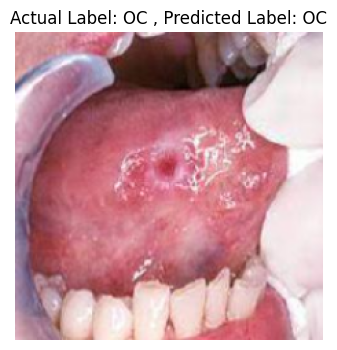

In [24]:
testing_image = '/kaggle/input/oral-diseases-dataset-7-different-diseases/Oral Diseases Dataset/Testing/OC/oc_1213.jpg'
prediction(testing_image, actual_label = 'OC')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


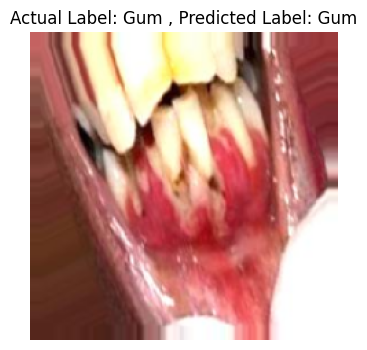

In [25]:
testing_image = '/kaggle/input/oral-diseases-dataset-7-different-diseases/Oral Diseases Dataset/Testing/Gum/g_1206_0_5439.jpg'
prediction(testing_image, actual_label = 'Gum')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


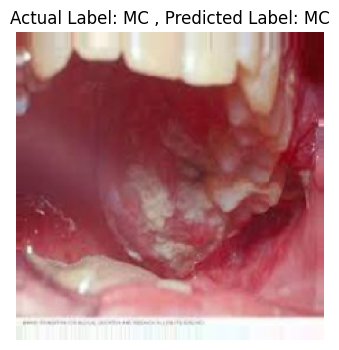

In [26]:
testing_image = '/kaggle/input/oral-diseases-dataset-7-different-diseases/Oral Diseases Dataset/Testing/MC/mc_1201.jpg'
prediction(testing_image, actual_label = 'MC')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


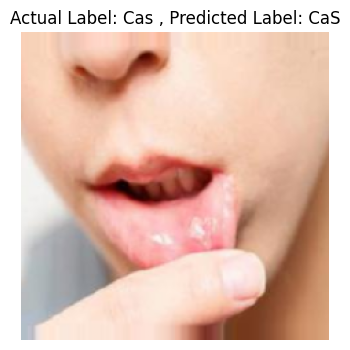

In [27]:
testing_image = '/kaggle/input/oral-diseases-dataset-7-different-diseases/Oral Diseases Dataset/Training/CaS/a_100_0_6639.jpg'
prediction(testing_image, actual_label = 'Cas')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


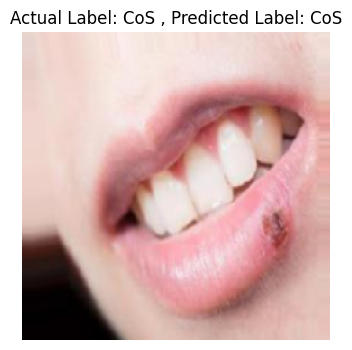

In [28]:
testing_image = '/kaggle/input/oral-diseases-dataset-7-different-diseases/Oral Diseases Dataset/Training/CoS/b_100_0_6694.jpg'
prediction(testing_image, actual_label = 'CoS')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


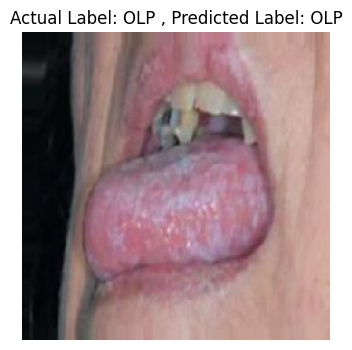

In [29]:
testing_image = '/kaggle/input/oral-diseases-dataset-7-different-diseases/Oral Diseases Dataset/Training/OLP/p_1200_0_7326.jpg'
prediction(testing_image, actual_label = 'OLP')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


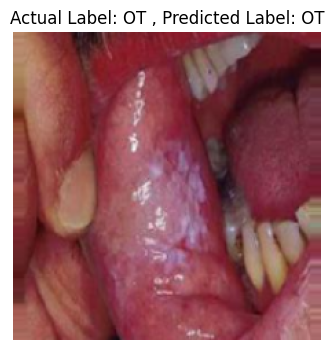

In [30]:
testing_image = '/kaggle/input/oral-diseases-dataset-7-different-diseases/Oral Diseases Dataset/Training/OT/ot_1200_0_3131.jpg'
prediction(testing_image, actual_label = 'OT')

# **Saving The Final Model :**

In [31]:
model2.save("Oral Diseases Classification Model ['OC', 'CaS', 'OT', 'CoS', 'Gum', 'MC', 'OLP'].h5")